In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')

In [3]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
data.shape

(5110, 12)

In [6]:
data['age'] = data['age'].astype(int) 

In [7]:
data['age'].nunique()

83

In [8]:
data = data.dropna(axis = 0)

In [9]:
data.shape

(4909, 12)

In [10]:
data['stroke'].value_counts()

0    4700
1     209
Name: stroke, dtype: int64

In [11]:
data [['avg_glucose_level','bmi']] = data[['avg_glucose_level','bmi']].astype(int)

In [12]:
data.drop('id', axis = 1,inplace = True)
data.drop('Residence_type', axis = 1,inplace = True)

In [13]:
le = LabelEncoder()
var_mod = data.select_dtypes(include='object').columns
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [14]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67,0,1,1,2,228,36,1,1
2,1,80,0,1,1,2,105,32,2,1
3,0,49,0,0,1,2,171,34,3,1
4,0,79,1,0,1,3,174,24,2,1
5,1,81,0,0,1,2,186,29,1,1


In [15]:
data.describe()

,gender,age,hypertension,heart_disease,ever_married,work_type,avg_glucose_level,bmi,smoking_status,stroke
count,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000,4909.000000
mean,0.410063,42.854145,0.091872,0.049501,0.652679,2.170096,104.816052,28.448564,1.375433,0.042575
std,0.492309,22.575986,0.288875,0.216934,0.476167,1.092593,44.417384,7.843834,1.067322,0.201917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.000000,10.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,2.000000,77.000000,23.000000,0.000000,0.000000
50%,0.000000,44.000000,0.000000,0.000000,1.000000,2.000000,91.000000,28.000000,2.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,1.000000,3.000000,113.000000,33.000000,2.000000,0.000000
max,2.000000,82.000000,1.000000,1.000000,1.000000,4.000000,271.000000,97.000000,3.000000,1.000000


C:\Users\folas\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

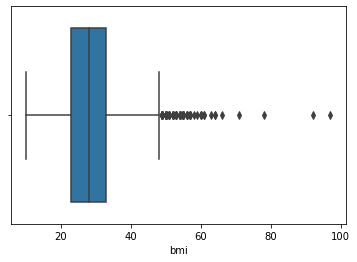

In [21]:
sns.boxplot(data['bmi'])

In [28]:
X = data.drop('stroke', axis = 1)
y = data['stroke']

In [29]:
sampler = SMOTE(sampling_strategy=0.7, random_state = 2)
X_sampled, y_sampled = sampler.fit_resample(X,y)

In [32]:
y_sampled.value_counts()

0    4700
1    3290
Name: stroke, dtype: int64

In [35]:
X_train,X_test,y_train,y_test = train_test_split(X_sampled,y_sampled,random_state = 3, test_size =103)

In [43]:
model = DecisionTreeClassifier(class_weight = 'balanced',max_depth = 20)
model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=20)

In [44]:
model.score(X_test,y_test)

0.9223300970873787

In [50]:
y_pred = model.predict(X_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [51]:
print( classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        62
           1       0.90      0.90      0.90        41

    accuracy                           0.92       103
   macro avg       0.92      0.92      0.92       103
weighted avg       0.92      0.92      0.92       103



In [55]:
# KNeigbor model
model2 = KNeighborsClassifier()
model2.fit(X_train,y_train)

KNeighborsClassifier()

In [56]:
model2.score(X_test,y_test)

0.912621359223301

In [58]:
y_pred1 = model2.predict(X_test) 
y_pred1

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1], dtype=int64)